In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import TomekLinks  # Importing Tomek Links for under-sampling
from imblearn.over_sampling import SMOTE  # Importing SMOTE for over-sampling


In [3]:
# Load the Parkinson's dataset
parkinsons_dataset = pd.read_csv("../../datasets/parkinsons.csv")

# Preprocess the dataset
parkinsons_dataset.drop('name', axis=1, inplace=True)  # Drop the 'name' column
X = parkinsons_dataset.drop(columns=['status'], axis=1)  # Features
y = parkinsons_dataset['status']  # Target

# Check if the data is imbalanced
print(parkinsons_dataset['status'].value_counts())


status
1    147
0     48
Name: count, dtype: int64


In [4]:
# Apply Tomek Links under-sampling
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X, y)

# Check the resampled class distribution
print(f"Resampled class distribution:\n{pd.Series(y_resampled).value_counts()}")


Resampled class distribution:
status
1    141
0     48
Name: count, dtype: int64


In [5]:
# Optionally, apply SMOTE over-sampling for the minority class (non-Parkinson's)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

# Check the class distribution after SMOTE
print(f"Class distribution after SMOTE:\n{pd.Series(y_resampled).value_counts()}")


Class distribution after SMOTE:
status
1    141
0    141
Name: count, dtype: int64


In [6]:
# Split the resampled dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shape of training and testing data
X_train.shape, X_test.shape


((225, 22), (57, 22))

In [7]:
# Train the Random Forest model with class weights
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Random Forest Accuracy: 0.9649


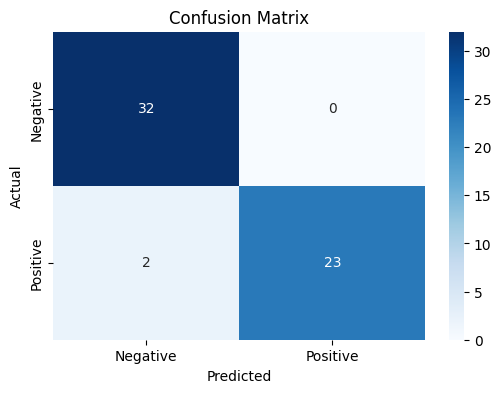

Precision: 1.0000
Recall: 0.9200
F1-Score: 0.9583


In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance (Accuracy)
accuracy = accuracy_score(Y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Calculate Precision, Recall, and F1-Score (for binary classification)
precision = precision_score(Y_test, y_pred, average='binary')
recall = recall_score(Y_test, y_pred, average='binary')
f1 = f1_score(Y_test, y_pred, average='binary')

# Print the metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


In [9]:
# Cross-validation (optional for model validation)
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=5)

# Print cross-validation accuracy for each fold and the mean accuracy
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


Cross-Validation Scores: [0.85964912 0.92982456 0.94642857 0.85714286 0.96428571]
Mean Cross-Validation Accuracy: 0.9115


In [11]:
import pickle
file_name = 'parkinsons_model.sav'
pickle.dump(model, open(file_name, 'wb'))